In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
lastD = session.query(Measure).order_by(Measure.date.desc()).first()
lastD.date

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
qD = dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcpQ = session.query(Measure.date,Measure.prcp).filter(Measure.date >= qD).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcpDf = pd.DataFrame(prcpQ)

# Sort the dataframe by date
prcpDf = prcpDf.sort_values(by=['date'])
prcpDf = prcpDf.reset_index()
prcpDf = prcpDf[['date','prcp']]
prcpDf = prcpDf.dropna()
# Use Pandas Plotting with Matplotlib to plot the data



<Figure size 4000x1000 with 0 Axes>

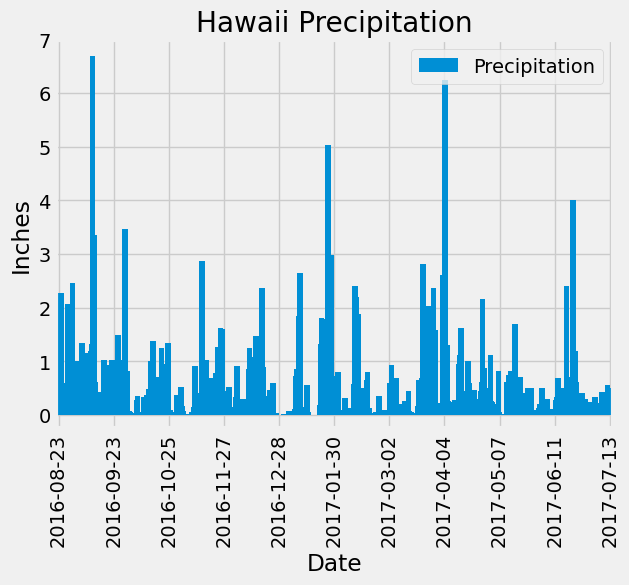

In [13]:
plt.figure(figsize=(40, 10))
prcpDf.plot(kind="bar",width=20)
n=10
x_index = range(0,len(prcpDf.index),len(prcpDf.index)//n)
x_labels = [prcpDf.date[i] for i in x_index]
plt.xticks(x_index,x_labels)
plt.ylim(-0.25,7)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper right',labels=['Precipitation'])
#plt.tight_layout()
plt.title('Hawaii Precipitation')
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcpDf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measure.station,func.count(Measure.date)).group_by(Measure.station).order_by(func.count(Measure.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measure.tobs),func.max(Measure.tobs),func.avg(Measure.tobs))\
    .filter(Measure.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

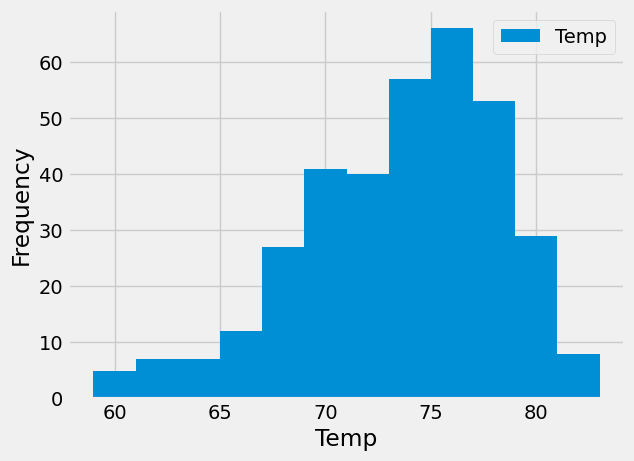

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempDf = pd.DataFrame(session.query(Measure.date,Measure.tobs)\
    .filter(Measure.station == 'USC00519281').filter(Measure.date >= qD).all())
tempDf = tempDf.sort_values(by='date')
tempDf.plot(kind='hist',bins=12)
plt.xlabel('Temp')
plt.legend(labels=['Temp'])

# Close Session

In [19]:
# Close Session
session.close()